In [10]:
import requests
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [1]:
def obtener_datos_historicos(criptomoneda, vs_moneda, dias):
    url = f'https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart'
    parametros = {
        'vs_currency': vs_moneda,
        'days': dias
    }
    respuesta = requests.get(url, params=parametros)
    datos = respuesta.json()
    precios = datos['prices']
    df = pd.DataFrame(precios, columns=['timestamp', 'precio'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df

In [5]:
df = obtener_datos_historicos('bitcoin', 'usd', 30)
display(df.head())

,precio
timestamp,
2024-05-25 05:07:51.320,68743.877587
2024-05-25 06:00:31.420,68696.974293
2024-05-25 07:08:02.798,68603.779191
2024-05-25 08:06:36.474,68790.865856
2024-05-25 09:00:28.536,68816.087830


In [6]:
df_candlestick = df['precio'].resample('D').ohlc()
display(df_candlestick.head())

,open,high,low,close
timestamp,,,,
2024-05-25,68743.877587,69377.145198,68603.779191,69212.435297
2024-05-26,69227.475131,69313.362136,68463.240020,68494.624248
2024-05-27,68496.173232,70425.806468,68407.015236,69504.523786
2024-05-28,69400.792811,69400.792811,67630.441620,68520.412882
2024-05-29,68316.635880,68778.162966,67215.416040,67620.482205


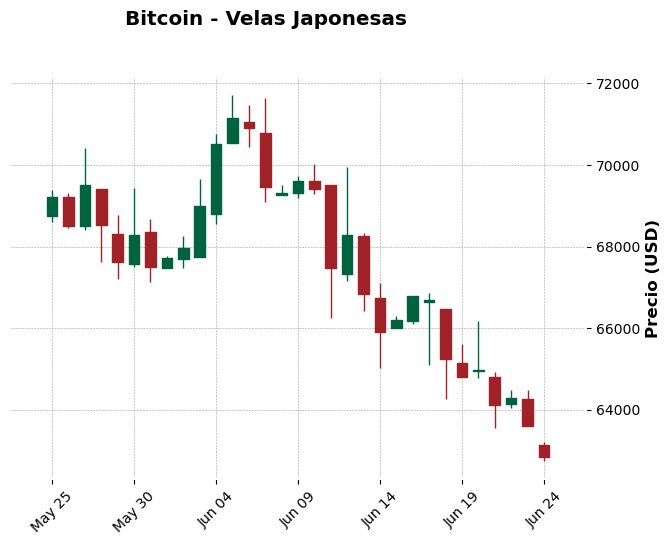

In [8]:
mpf.plot(df_candlestick, type='candle', style='charles', title='Bitcoin - Velas Japonesas', ylabel='Precio (USD)')

In [9]:
df.describe()

,precio
count,720.000000
mean,67647.842504
std,2048.976037
min,62744.343459
25%,66172.080692
50%,67751.229818
75%,69227.794869
max,71713.940770


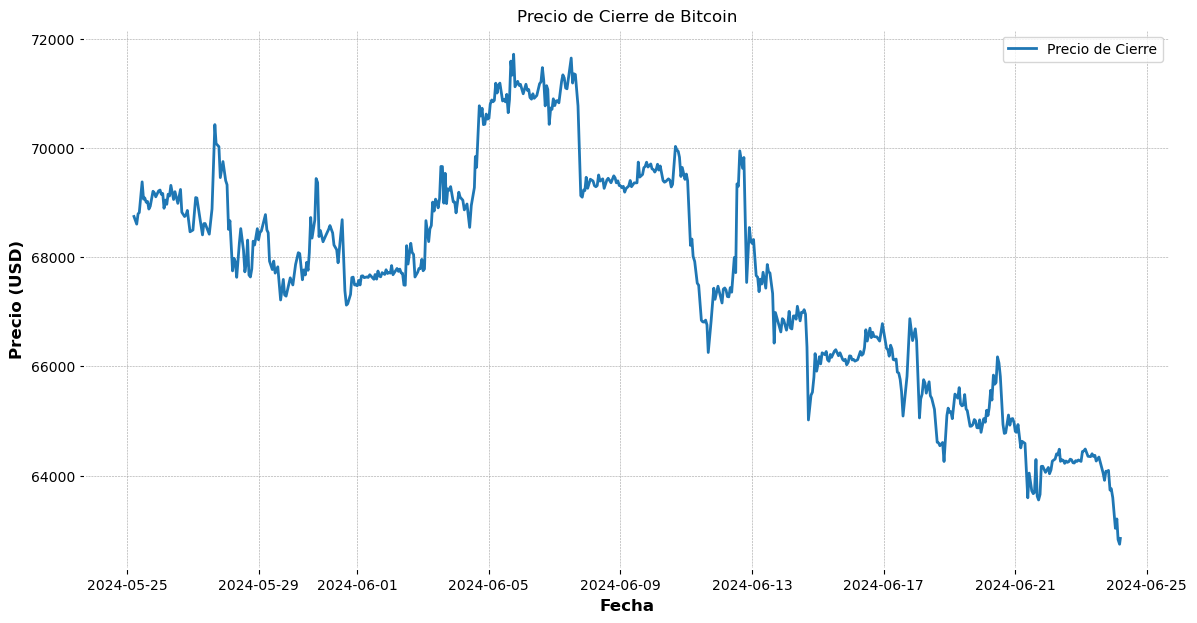

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['precio'], label='Precio de Cierre')
plt.title('Precio de Cierre de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

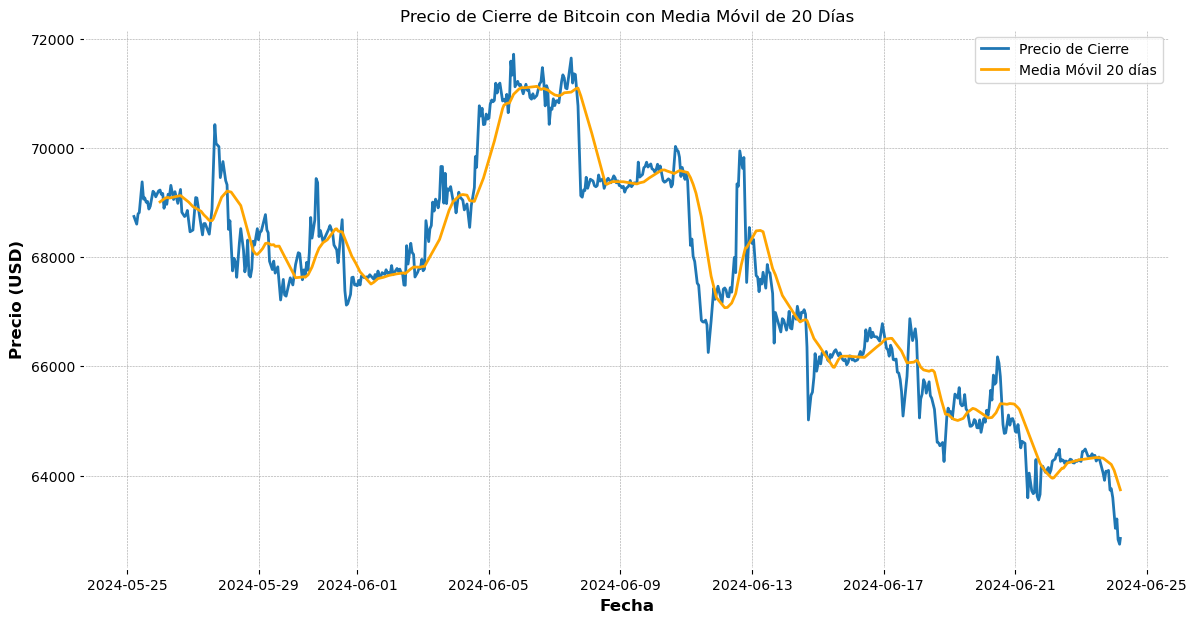

In [12]:
df['Media_Movil_20'] = df['precio'].rolling(window=20).mean()
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['precio'], label='Precio de Cierre')
plt.plot(df.index, df['Media_Movil_20'], label='Media Móvil 20 días', color='orange')
plt.title('Precio de Cierre de Bitcoin con Media Móvil de 20 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()